<a href="https://colab.research.google.com/github/dornercr/DSCI511/blob/main/DSCI511_lecture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Basic Data Types in Python
- **Booleans**: `True` / `False`, often used in logic.
- **Integers**: Exact whole numbers.
- **Floats**: Decimal numbers, stored in scientific notation under the hood.

📖 References:  
- [Python Booleans](https://docs.python.org/3/library/stdtypes.html#boolean-values)  
- [Python Numbers](https://docs.python.org/3/library/stdtypes.html#numeric-types-int-float-complex)


In [1]:
print("--- Booleans ---")
print(bool())               # Default False
print(True and False)       # False
print(bool([]))             # Empty list = False
print(bool([1, 2, 3]))      # Non-empty list = True

print("\n--- Integers ---")
x = 13
print(x, type(x))
print(x + 7)
print(int())                # 0 by default

print("\n--- Floats ---")
print(float())              # 0.0 by default
y = 13 / 2
print(y, type(y))           # Float division in Python 3
print(3.14 * 2)


--- Booleans ---
False
False
False
True

--- Integers ---
13 <class 'int'>
20
0

--- Floats ---
0.0
6.5 <class 'float'>
6.28


### Strings & Encodings
- **ASCII**: 128 characters, one byte each.  
- **Unicode**: Global standard, supports virtually all writing systems.  
- **UTF-8**: Efficient compromise, 1–4 bytes per character.  

📖 References:  
- [ASCII Table](https://en.wikipedia.org/wiki/ASCII)  
- [Unicode Standard](https://home.unicode.org/)  
- [UTF-8 Explained](https://en.wikipedia.org/wiki/UTF-8)


In [2]:
print("--- Strings & Encodings ---")

# ASCII string
ascii_str = "Hello"
print(ascii_str.encode("ascii"))

# Unicode string with accent
unicode_str = "Café"
print(unicode_str.encode("utf-8"))

# Strings in other scripts
chinese = "数据"   # "data" in Chinese
arabic = "بيانات" # "data" in Arabic
print(chinese.encode("utf-8"))
print(arabic.encode("utf-8"))


--- Strings & Encodings ---
b'Hello'
b'Caf\xc3\xa9'
b'\xe6\x95\xb0\xe6\x8d\xae'
b'\xd8\xa8\xd9\x8a\xd8\xa7\xd9\x86\xd8\xa7\xd8\xaa'


### UTF-8 Encoding
- Uses **variable-length encoding**.  
- English characters = 1 byte.  
- Characters like `—` (em dash) or Chinese characters take more.  

📖 References:  
- [UTF-8 Byte Layout](https://en.wikipedia.org/wiki/UTF-8#Description)


In [3]:
char = "—"  # em dash
encoded = char.encode("utf-8")
print("Character:", char)
print("UTF-8 bytes:", encoded)
print("Length in bytes:", len(encoded))


Character: —
UTF-8 bytes: b'\xe2\x80\x94'
Length in bytes: 3


### Images as Data
- **Vector images**: Defined by equations (infinitely scalable).  
- **Raster images**: Grids of pixels (real-world data).  
- Pixels store values for Red, Green, Blue (and sometimes Alpha = transparency).  

📖 References:  
- [Raster vs Vector](https://www.printcnx.com/resources-and-support/addiational-resources/raster-images-vs-vector-graphics/)  
- [PIL (Python Imaging Library)](https://pillow.readthedocs.io/en/stable/)


In [15]:
from PIL import Image, ImageDraw

# Create a blank white image
img = Image.new("RGBA", (200, 200), (255, 255, 255, 255))
draw = ImageDraw.Draw(img)

# Draw a yellow circle for the face
draw.ellipse((25, 25, 175, 175), fill=(255, 255, 0, 255), outline=(0, 0, 0, 255))

# Draw two black eyes
draw.ellipse((65, 70, 85, 90), fill=(0, 0, 0, 255))
draw.ellipse((115, 70, 135, 90), fill=(0, 0, 0, 255))

# Draw a smile
draw.arc((75, 100, 125, 150), start=0, end=180, fill=(0, 0, 0, 255), width=3)

# Save base smiley
img.save("smiley.png")
img.show()

# Now make "crazy eyes" by changing pixels
pixels = img.load()
for i in range(65, 85):   # left eye block
    for j in range(70, 90):
        pixels[i, j] = (255, 0, 0, 255)  # red

for i in range(115, 135): # right eye block
    for j in range(70, 90):
        pixels[i, j] = (0, 255, 0, 255)  # green

img.save("smiley_crazy.png")
img.show()


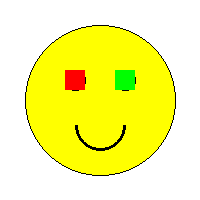

In [16]:
from IPython.display import Image, display

# After saving with PIL
img.save("smiley.png")

# Show inline in Colab
display(Image(filename="smiley.png"))


### Smiley Example  

Here is the generated smiley face stored as a PNG:  

![Smiley Face](smiley.png)  

Notice how it’s drawn as a **raster image** — a grid of pixels. We can then manipulate individual pixel values in Python, like we did to give it “crazy eyes.”  


### File I/O Basics
- `open("filename", "r")` = read  
- `open("filename", "w")` = write (overwrites file)  
- `open("filename", "a")` = append  
- Always use `with` to close files automatically.  

📖 References:  
- [Python File I/O](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)


In [6]:
# Write to file
with open("example.txt", "w") as f:
    f.write("Hello, world!\nThis is a test file.")

# Read from file
with open("example.txt", "r") as f:
    content = f.read()
print("File content:\n", content)


File content:
 Hello, world!
This is a test file.


### File Formats
- **Pickle**: Serialize Python objects (not portable, security risk).  
- **JSON**: Human-readable, language independent.  
- **XML**: Hierarchical, tag-based.  
- **CSV**: Tabular, widely used in business.  

📖 References:  
- [Pickle Docs](https://docs.python.org/3/library/pickle.html)  
- [JSON Docs](https://docs.python.org/3/library/json.html)  
- [XML](https://en.wikipedia.org/wiki/XML)  
- [CSV](https://en.wikipedia.org/wiki/Comma-separated_values)


In [11]:
import pickle, json, csv
import dicttoxml, xmltodict

# Pickle
data = {"name": "Alice", "age": 30}
with open("data.pkl", "wb") as f:
    pickle.dump(data, f)
with open("data.pkl", "rb") as f:
    print("Pickle loaded:", pickle.load(f))

# JSON
with open("data.json", "w") as f:
    json.dump(data, f)
with open("data.json", "r") as f:
    print("JSON loaded:", json.load(f))

# XML
xml_data = dicttoxml.dicttoxml(data)
print("XML string:", xml_data.decode("utf-8"))
parsed = xmltodict.parse(xml_data)
print("XML parsed:", parsed)

# CSV
with open("data.csv", "w", newline="") as f:
    writer = csv.DictWriter(f, fieldnames=data.keys())
    writer.writeheader()
    writer.writerow(data)
with open("data.csv", "r") as f:
    print("CSV content:\n", f.read())


Pickle loaded: {'name': 'Alice', 'age': 30}
JSON loaded: {'name': 'Alice', 'age': 30}
XML string: <?xml version="1.0" encoding="UTF-8" ?><root><name type="str">Alice</name><age type="int">30</age></root>
XML parsed: {'root': {'name': {'@type': 'str', '#text': 'Alice'}, 'age': {'@type': 'int', '#text': '30'}}}
CSV content:
 name,age
Alice,30



### Summary
- Data science combines analytics, software engineering, and domain expertise.  
- 80% of the work = acquiring and cleaning data.  
- Data types: booleans, ints, floats, strings, images, files.  
- Encodings (ASCII, Unicode, UTF-8) matter for text.  
- File formats (Pickle, JSON, XML, CSV) enable exchange.  
- Images are just arrays of pixels — numbers we can manipulate.

📖 Extra Reading:  
- [Data Science Venn Diagram](http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram)  
- [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)  
- [Garbage In, Garbage Out](https://en.wikipedia.org/wiki/Garbage_in,_garbage_out)
